In [1]:
import pandas as pd 
from path_object import Global_nav
import matplotlib.pyplot as plt
import time

### Global path planning

To succesfully navigate an environment a path needs to be computed. For our 'space' environment we wanted a path close to the optimal path and a efficient computation. Visibility graphs are very efficient and can find the optimal path. However, with round planets this does not work because of the missing edges. While the planets could be approximated with polygons to be used with the visibility graph, we chose the A* algorithm. 

The A* is optimal and relatively efficient to compute. The A* algorithm works on a grid with discrete points and therefore has a tradeoff between resolution and computation time. For the map a resolution of 100x70 was chosen since this is the same aspect ratio as the camera used. This offers a computation time of around 70ms for the gloabl path as seen below. Since A* operates with discrete points the path is not necessarily straight between two points. The A* algorithm implemented here uses 16 directions as the standard, which results in the blue path shown in the figure below. As mentioned before this path is not straight between point. To solve this the path is modified by a line of sight algorithm. This algorithm draws a line to the furthest possible point and removes all intermediate points. This process is repeated from the next point. Since our robot operates from point to point a too long path, the long segments are divided into subsegment with a max length of 4. This results in the red path. This path has a lot less points and goes in a straight line between points. 

___Explain why robot can drive all the way to the edge___


\cite https://en.wikipedia.org/wiki/A*_search_algorithm 

In [2]:
global_nav = Global_nav(movements='16N')
coordinates =  [['robot', [0.05, 0.95, 0.09, 0.13], 0.965], ['mars', [0.95, 0.05, 0.08, 0.08], 0.902], ['earth', [0.05, 0.95, 0.08, 0.1], 0.942], ['blackholes', [0.2, 0.85, 0.11, 0.15], 0.906], ['blackholes', [0.25, 0.45, 0.09, 0.09], 0.896], ['blackholes', [0.65, 0.25, 0.06, 0.08], 0.876], ['blackholes', [0.8, 0.4, 0.07, 0.08], 0.867]]

In [3]:
%%time
start, goal, earth, robot_radius, earth_radius, black_holes_centers, black_holes_radiuss,scale_factor = global_nav.convert_OPENCV_tovalues(coordinates)
occ, _,_=  global_nav.create_map( goal = goal ,black_holes_centers = black_holes_centers,black_holes_radiuss=black_holes_radiuss)
opti_path, path, closed, open = global_nav.get_path_straight(start=start,goal=goal)

CPU times: user 111 ms, sys: 3.2 ms, total: 114 ms
Wall time: 118 ms


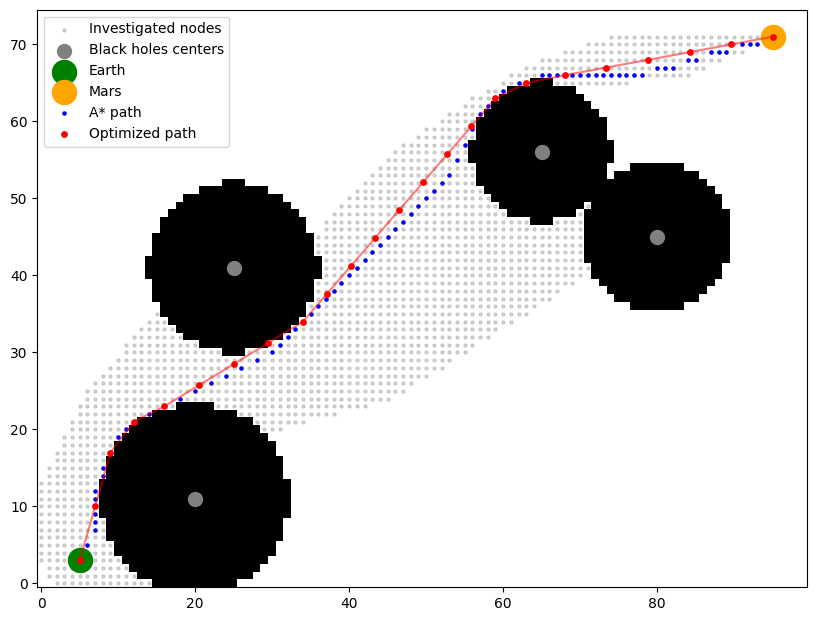

In [4]:
plt.figure(figsize=(10,7.5))
plt.imshow(occ.transpose(), cmap='Greys', origin='lower')
plt.scatter([x[0] for x in closed], [x[1] for x in closed], c='grey',s=5, alpha=0.3)
plt.scatter([x[0] for x in black_holes_centers], [x[1] for x in black_holes_centers], c='grey',s=100)
plt.scatter(earth[0],earth[1], c='green',s=300)
plt.scatter(goal[0],goal[1], c='orange',s=300)

plt.scatter([x[0] for x in path], [x[1] for x in path],color = 'b',s=5)

plt.scatter([x[0] for x in opti_path], [x[1] for x in opti_path], c='r',s=15)
plt.plot([x[0] for x in opti_path], [x[1] for x in opti_path], c='r', alpha=0.5)
plt.legend(['Investigated nodes','Black holes centers', 'Earth', 'Mars' , 'A* path', 'Optimized path'])
plt.show()

In [5]:
import numpy as np 


In [6]:
max((np.linalg.norm(np.array([0,0])np.array([0,5]))/2).astype(int),1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3135107175.py, line 1)